In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# From Week 10, Day 2, Activity 8 (In Class Activity)
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
--------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
--------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [13]:
# From Week 10, Day 2, Activity 8 (In Class Activity)
#Print all of the classes mapped to the Base
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [15]:
 # Assign the measurement class to a variable called `Measurement` 
Measurement = Base.classes.measurement
# and the station class to a variable called `Station`
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine) 
conn = engine.connect()

# Exploratory Precipitation Analysis

In [20]:
# From Week 10, Day 2, Activity 8 (In Class Activity)
# Find the most recent date in the data set.
query = text("""
                SELECT
                    max(date)
                FROM
                    measurement;
            """)
df1 = pd.read_sql(query, con=conn)
df1
#conn.execute(query).fetchall()

,max(date)
0,2017-08-23


<Figure size 1400x600 with 0 Axes>

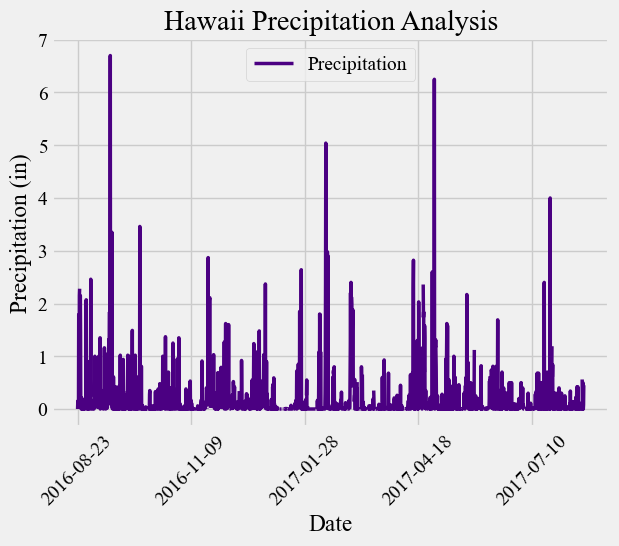

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
query = text("""SELECT
                    id,
                    station,
                    date,
                    prcp
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
                ORDER BY
                    date;""")
df1 = pd.read_sql(query, con=conn)


# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['font.family'] = 'Times New Roman'
 # Make Plot
plt.figure(figsize=(14, 6))
# plt.plot(df1.date, df1.prcp)
df1.plot(x="date", y="prcp", color= "indigo", label='Precipitation', linewidth=2.5)
plt.title("Hawaii Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
#print("Precipitation Data Statistics Summary:")
df1.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
query = text("""
                SELECT
                    count(station)
                FROM
                    station;
            """)
df2 = pd.read_sql(query, con=conn)
df2

,count(station)
0,9


In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
 # Raw SQL
query = text("""SELECT
                    station,
                    count(id) as num_observations
                FROM
                    measurement
                GROUP BY
                    station
                ORDER BY
                    num_observations desc;""")
df3 = pd.read_sql(query, con=conn)
df3

,station,num_observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Use USC00519281 previous code
query = text("""SELECT
                    min(tobs) as minTemp,
                    max(tobs) as maxTemp,
                    avg(tobs) as avgTemp
                FROM
                    measurement
                WHERE
                    station = 'USC00519281';""")
df4 = pd.read_sql(query, con=conn)
df4

,minTemp,maxTemp,avgTemp
0,54.0,85.0,71.663781


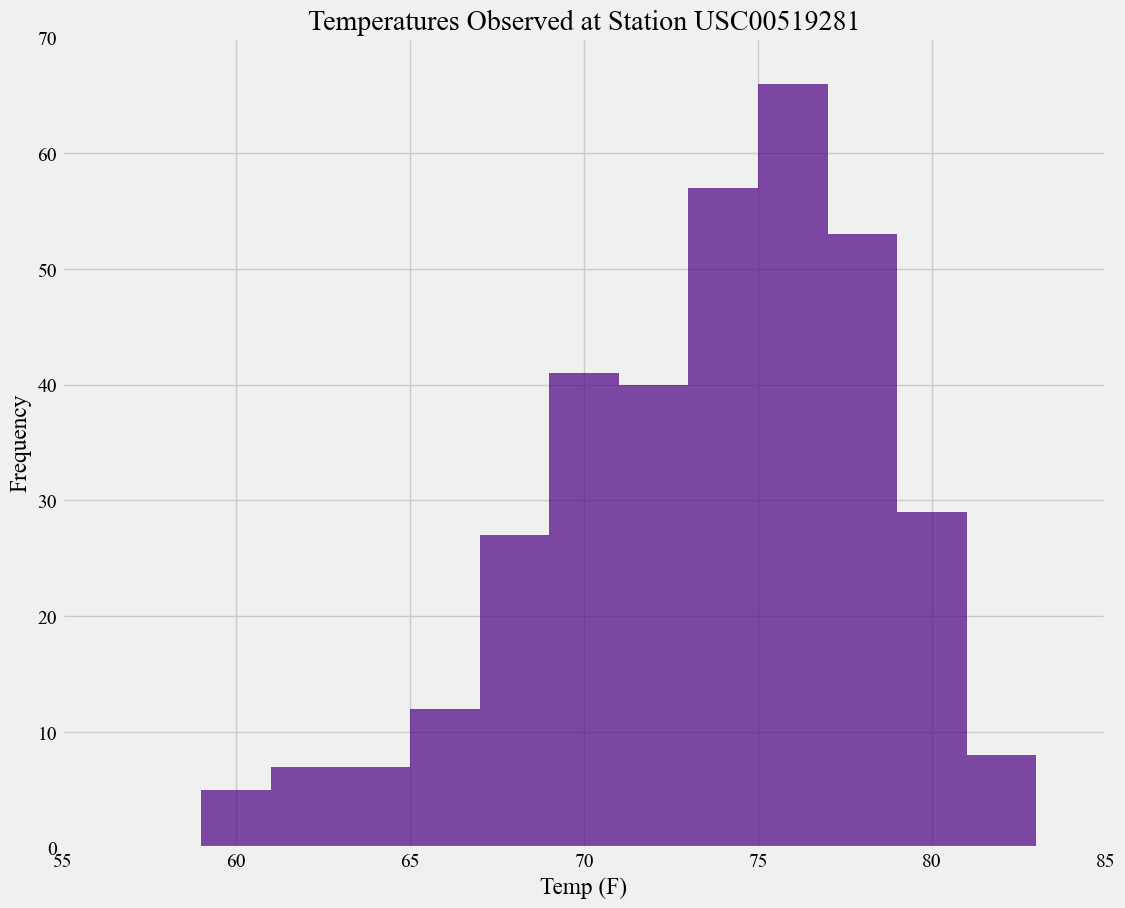

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Raw SQL

df5 = pd.read_sql(query, con=conn)
df5.head()

 # Make plot
plt.figure(figsize=(12, 10))
plt.hist(df5.tobs, bins=12, color= "indigo", alpha=0.7)
# df1.plot(x="date", y="prcp")
plt.title("Temperatures Observed at Station USC00519281")
plt.xlim(55, 85)
plt.ylim(0, 70)
plt.xlabel("Temp (F)")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [58]:
# Close Session
session.close()